3. Data Analysis and Visualization

In [2]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import*

from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType

In [3]:
spark = SparkSession\
    .builder\
    .appName("capstone")\
    .config("spark.jars","/Users/roy/Downloads/mysql-connector-j-8.0.32/mysql-connector-j-8.0.32.jar")\
    .getOrCreate()

23/02/28 20:18:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/02/28 20:18:11 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/02/28 20:18:11 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/02/28 20:18:11 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
23/02/28 20:18:11 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.


In [201]:
#connecting to db to read data
ccviz = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
    .option("dbtable", "creditcard_capstone.CDW_SAPP_CREDIT_CARD") \
          .option("user", "root") \
            .option("password", "password") \
            .load()
ccviz.show(1)

+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|  TIMEID|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
|        180|4210653342242023|123451310| 15|    3|         45069|           Bills|            77.79|2018|20180315|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
only showing top 1 row



In [202]:
# convert PySpark DataFrame to Pandas DataFrame
cc_pd = ccviz.toPandas()
cc_pd.head(2)

,BRANCH_CODE,CREDIT_CARD_NO,CUST_SSN,DAY,MONTH,TRANSACTION_ID,TRANSACTION_TYPE,TRANSACTION_VALUE,YEAR,TIMEID
0,180,4210653342242023,123451310,15,3,45069,Bills,77.79,2018,20180315
1,114,4210653349028689,123459988,14,2,1,Education,78.90,2018,20180214


In [203]:
cc_pd.describe()


,BRANCH_CODE,CUST_SSN,DAY,MONTH,TRANSACTION_ID,TRANSACTION_VALUE,YEAR
count,46694.000000,4.669400e+04,46694.000000,46694.000000,46694.000000,46694.000000,46694.0
mean,75.000578,1.234555e+08,14.507367,6.516876,23347.500000,51.039382,2018.0
std,51.389075,2.561261e+03,8.066305,3.453508,13479.541072,28.783264,0.0
min,1.000000,1.234510e+08,1.000000,1.000000,1.000000,1.010000,2018.0
25%,31.000000,1.234534e+08,8.000000,4.000000,11674.250000,25.970000,2018.0
50%,67.000000,1.234555e+08,15.000000,7.000000,23347.500000,51.110000,2018.0
75%,114.000000,1.234577e+08,21.000000,10.000000,35020.750000,75.940000,2018.0
max,192.000000,1.234600e+08,28.000000,12.000000,46694.000000,100.990000,2018.0


In [204]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns

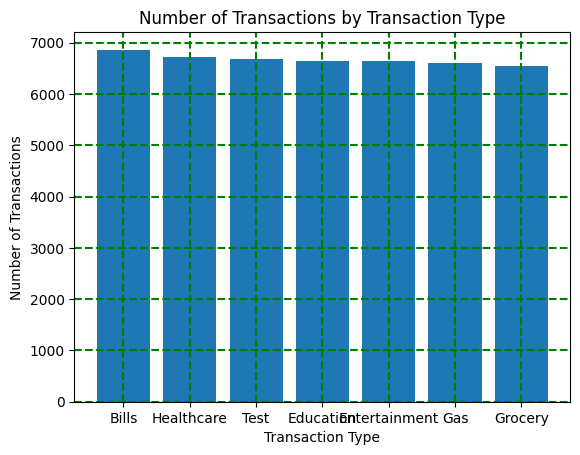

In [205]:
# 3.1 Count the number of transactions for each transaction type
transaction_counts = cc_pd["TRANSACTION_TYPE"].value_counts()

# Create a bar chart to visualize the result
mpl.bar(  transaction_counts.index, transaction_counts.values)
mpl.title("Number of Transactions by Transaction Type")
mpl.xlabel("Transaction Type")
mpl.ylabel("Number of Transactions")
mpl.grid(True, linewidth= 1.5, linestyle="--", color= 'green')
mpl.show()

In [206]:
custviz = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
    .option("dbtable", "creditcard_capstone.CDW_SAPP_CUSTOMER") \
          .option("user", "root") \
            .option("password", "password") \
            .load()
custviz.show(1)

+----------------+---------+-------------+-------------------+-------------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
|  CREDIT_CARD_NO|CUST_CITY| CUST_COUNTRY|         CUST_EMAIL|   CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|        LAST_UPDATED|MIDDLE_NAME|      SSN| FULL_STREET_ADDRESS|
+----------------+---------+-------------+-------------------+-------------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
|4210653310061055|  Natchez|United States|AHooper@example.com|(880)123-7818|        MS|   39120|      Alec|   Hooper|2018-04-21T12:49:...|         wm|123456100|Main Street North...|
+----------------+---------+-------------+-------------------+-------------+----------+--------+----------+---------+--------------------+-----------+---------+--------------------+
only showing top 1 row



In [207]:
customer_pd = custviz.toPandas()
customer_pd.head(2)

,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,FULL_STREET_ADDRESS
0,4210653310061055,Natchez,United States,AHooper@example.com,(880)123-7818,MS,39120,Alec,Hooper,2018-04-21T12:49:02.000-04:00,wm,123456100,"Main Street North, 656"
1,4210653310102868,Wethersfield,United States,EHolman@example.com,(880)123-8933,CT,06109,Etta,Holman,2018-04-21T12:49:02.000-04:00,brendan,123453023,"Redwood Drive, 829"


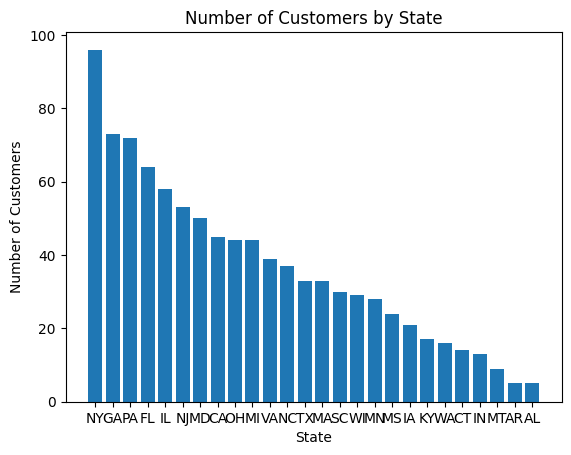

In [210]:
# 3.2 Count the number of customers in each state

custviz = customer_pd["CUST_STATE"].value_counts()

# Create a bar chart to visualize the result
mpl.bar(custviz.index, custviz.values)
mpl.title("Number of Customers by State")
mpl.xlabel("State")
mpl.ylabel("Number of Customers")
mpl.grid(True, linewidth= 2, linestyle=" ")
mpl.show()


#3.3

In [187]:
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns

In [188]:
#connecting to db to read data
ccviz = spark.read.format("jdbc") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
    .option("dbtable", "creditcard_capstone.CDW_SAPP_CREDIT_CARD") \
          .option("user", "root") \
            .option("password", "password") \
            .load()
ccviz.show(1)



+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|  TIMEID|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
|        180|4210653342242023|123451310| 15|    3|         45069|           Bills|            77.79|2018|20180315|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+--------+
only showing top 1 row



In [189]:
# convert PySpark DataFrame to Pandas DataFrame
cc_pd = ccviz.toPandas()
cc_pd.head(2)
cc_pd.describe()

,BRANCH_CODE,CUST_SSN,DAY,MONTH,TRANSACTION_ID,TRANSACTION_VALUE,YEAR
count,46694.000000,4.669400e+04,46694.000000,46694.000000,46694.000000,46694.000000,46694.0
mean,75.000578,1.234555e+08,14.507367,6.516876,23347.500000,51.039382,2018.0
std,51.389075,2.561261e+03,8.066305,3.453508,13479.541072,28.783264,0.0
min,1.000000,1.234510e+08,1.000000,1.000000,1.000000,1.010000,2018.0
25%,31.000000,1.234534e+08,8.000000,4.000000,11674.250000,25.970000,2018.0
50%,67.000000,1.234555e+08,15.000000,7.000000,23347.500000,51.110000,2018.0
75%,114.000000,1.234577e+08,21.000000,10.000000,35020.750000,75.940000,2018.0
max,192.000000,1.234600e+08,28.000000,12.000000,46694.000000,100.990000,2018.0


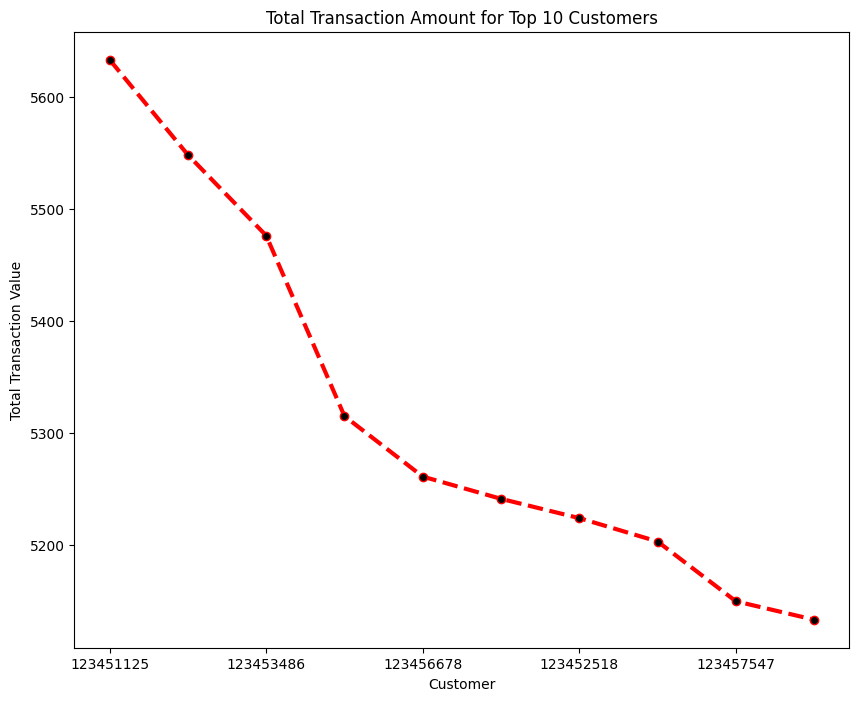

Customer with the highest transaction amount: 123451125
(Index(['123451125', '123452783', '123453486', '123458668', '123456678',
       '123452026', '123452518', '123454933', '123457547', '123452085'],
      dtype='string', name='CUST_SSN'), array([5633.07, 5548.14, 5476.08, 5314.97, 5261.03, 5241.18, 5223.96,
       5203.08, 5149.75, 5133.29]))


In [190]:
# 3.3 

# Group the transactions by customer and sum the transaction amounts for each customer
cc_pd['CUST_SSN'] = cc_pd['CUST_SSN'].astype('string')
cc_pd = cc_pd.groupby("CUST_SSN")["TRANSACTION_VALUE"].sum()

# Sort the result in descending order by the transaction amount and select the top 10 customers
top_10_customers = cc_pd.sort_values(ascending=False).head(10)

# Create a bar chart to visualize the total transaction amount for each of the top 10 customers
top_10_customers.plot(kind='line', x='CUST_SSN', y='TRANSACTION_VALUE', color='r', marker='o', markerfacecolor='k', 
      linestyle='--', linewidth = 3, figsize=(10,8))
#sns.barplot(top_10_customers.index, top_10_customers.values)
mpl.title("Total Transaction Amount for Top 10 Customers")
mpl.xlabel("Customer")
mpl.ylabel("Total Transaction Value")
mpl.show()

# Display the customer with the highest transaction amount
highest_customer = top_10_customers.idxmax()
print("Customer with the highest transaction amount:", highest_customer)


top_10=(top_10_customers.index, top_10_customers.values)
print(top_10)